<h1> Support Vector Machines </h1>

<h2> [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)</h2>

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.


<h2> Project Goals </h2>

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---


# Import and Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Regression/wine_fraud.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


## Count plot

<Axes: xlabel='quality', ylabel='count'>

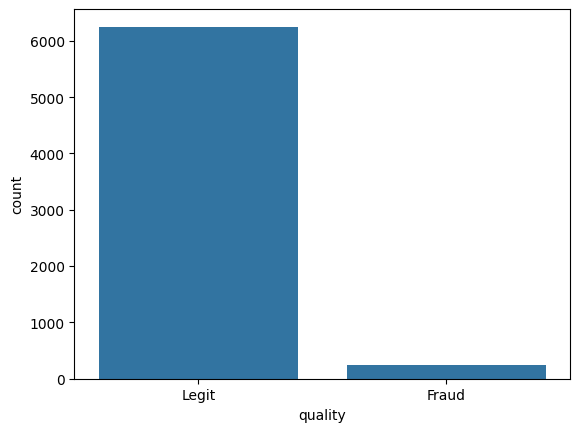

In [5]:
sns.countplot(x='quality', data=df)

<Axes: xlabel='type', ylabel='count'>

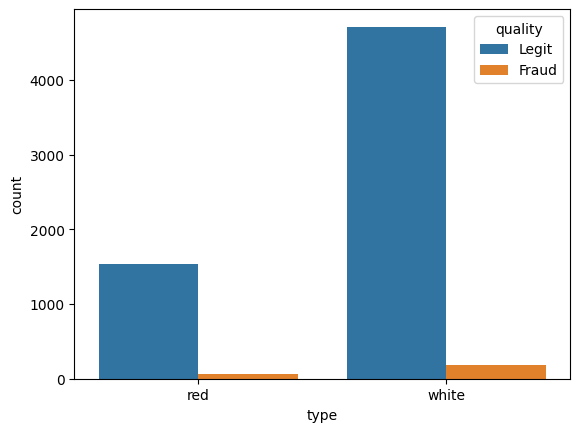

In [6]:
sns.countplot(x='type', hue='quality', data=df)

<h4>What percentage of red wines are Fraud? What percentage of white wines are fraud?</h4>

In [7]:
reds = df[df['type']=='red']

print(f"% of fraud white: {(100 * len(reds[reds.quality == 'Fraud'])/len(reds)):.2f}")

% of fraud white: 3.94


In [8]:
whites = df[df['type']=='white']

print(f"5 of white fraud: {(100 * len(whites[whites['quality']=='Fraud'])/len(whites)):.2f}")

5 of white fraud: 3.74


## Heat map

In [9]:
# Encode quality column
df['Target'] = df['quality'].map({'Fraud':1,'Legit':0})

corr = df.select_dtypes(include=np.number).corr()
corr['Target']

,Target
fixed acidity,0.021794
volatile acidity,0.151228
citric acid,-0.061789
residual sugar,-0.048756
chlorides,0.034499
free sulfur dioxide,-0.085204
total sulfur dioxide,-0.035252
density,0.016351
pH,0.020107
sulphates,-0.034046


## Bar Plot


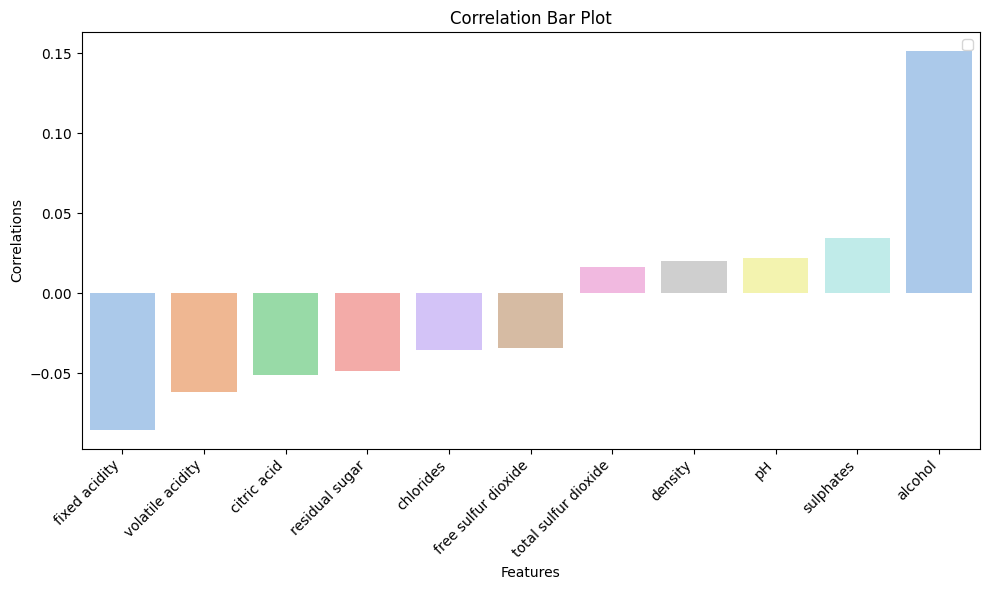

In [10]:
# corr['Target'][:-1].plot(kind='bar')

features = corr['Target'][:-1].index
values = corr['Target'][:-1].sort_values()

# Define color palette
palette = sns.color_palette('pastel', n_colors=len(features))  # Choose a theme and set the number of colors

# Plot with color theme
plt.figure(figsize=(10, 6))
sns.barplot(y=values, x=features, palette=palette, hue=features)
plt.title('Correlation Bar Plot')
plt.xlabel('Features')
plt.ylabel('Correlations')
plt.legend([],[]) # hide legend
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Clustermap

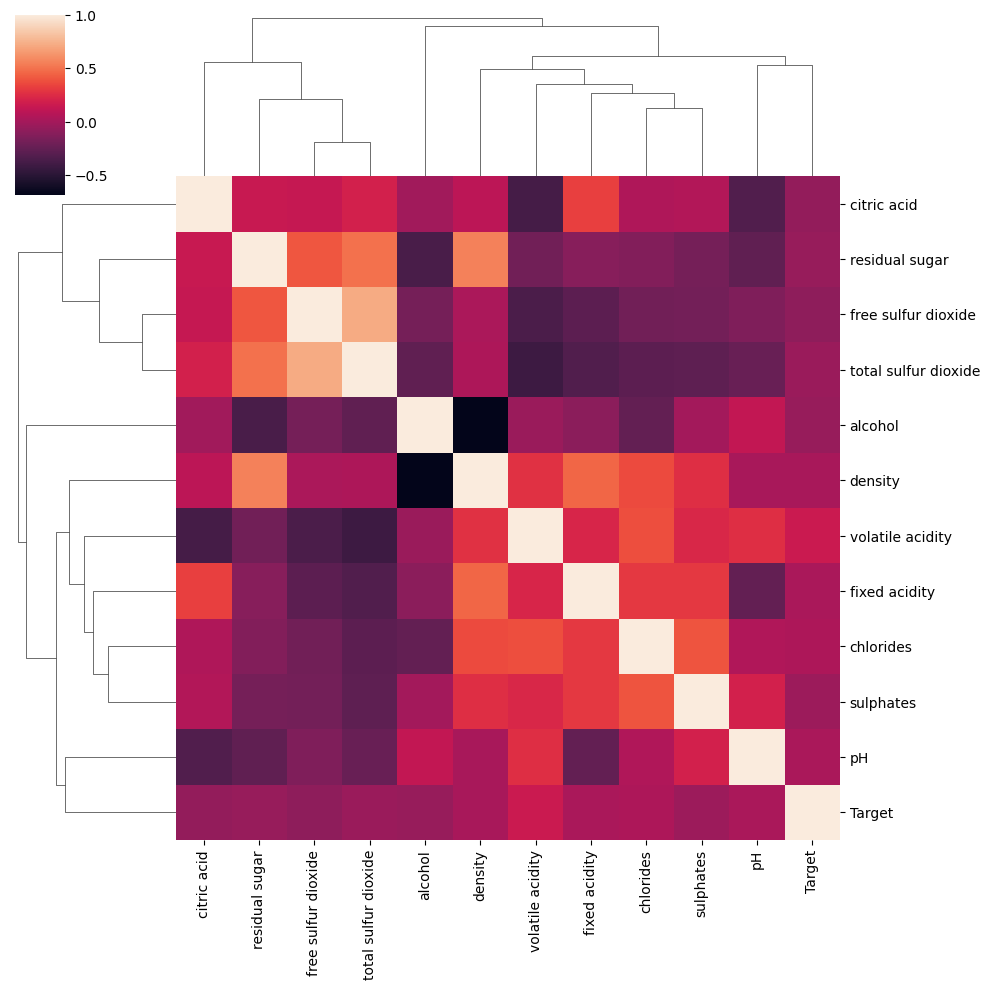

In [11]:
sns.clustermap(df.select_dtypes(include=np.number).corr(), )

----
# Machine Learning Model



## Encode categorical data


In [12]:
# df['type'] = df['type'].map({'red':1, 'white':0})
df['type'] = pd.get_dummies(df['type'], drop_first=True, dtype=int)

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0


## Split Train Test dataset

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Target','quality'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y, shuffle=True)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Model Setup

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(class_weight='balanced')
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1],
              'gamma': ['scale', 'auto']}

grid = GridSearchCV(svc, param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............................C=0.001, gamma=scale; total time=   2.9s
[CV] END ...............................C=0.001, gamma=scale; total time=   2.9s
[CV] END ...............................C=0.001, gamma=scale; total time=   1.6s
[CV] END ...............................C=0.001, gamma=scale; total time=   1.5s
[CV] END ...............................C=0.001, gamma=scale; total time=   1.6s
[CV] END ................................C=0.001, gamma=auto; total time=   1.6s
[CV] END ................................C=0.001, gamma=auto; total time=   1.5s
[CV] END ................................C=0.001, gamma=auto; total time=   1.5s
[CV] END ................................C=0.001, gamma=auto; total time=   2.3s
[CV] END ................................C=0.001, gamma=auto; total time=   2.4s
[CV] END ................................C=0.01, gamma=scale; total time=   1.4s
[CV] END ................................C=0.01,

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']},
             verbose=2)

### Model parameter

In [35]:
grid.best_params_

{'C': 1, 'gamma': 'scale'}

## Model Evaluation

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

y_pred = grid.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)


### Accuracy

In [36]:
accuracy_score(y_test, y_pred)

0.8553846153846154

### Confusion Matrix

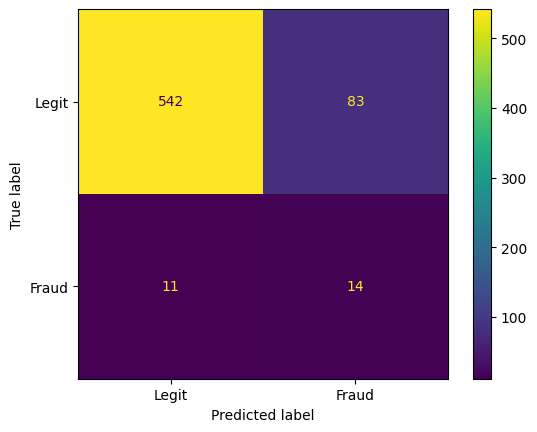

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=df['quality'].unique())

### Classification Report

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.14      0.56      0.23        25
       Legit       0.98      0.87      0.92       625

    accuracy                           0.86       650
   macro avg       0.56      0.71      0.57       650
weighted avg       0.95      0.86      0.89       650



# Summary

**Confusion Matrix Analysis**:

* True Negatives (Legit predicted as Legit): 542
* False Positives (Legit predicted as Fraud): 83
* False Negatives (Fraud predicted as Legit): 11
* True Positives (Fraud predicted as Fraud): 14
* This shows that the model is performing well in identifying legitimate transactions but struggles with detecting fraudulent ones.



**Classification Report Insights**:

* Fraud Class:
  * Precision: 0.14 – Only 14% of predicted fraud cases are correct, indicating a high false positive rate.
  * Recall: 0.56 – The model catches 56% of actual fraud cases but misses out on 44%.
  * F1-score: 0.23 – This low F1 score reflects poor performance for detecting fraud cases.

* Legit Class:
  * Precision: 0.98 – High precision means most predicted legitimate cases are correct.
  * Recall: 0.87 – The model captures 87% of legitimate cases, with some false negatives.
  * F1-score: 0.92 – This score is high, indicating reliable performance for legitimate cases.

**Overall Performance** :

* Accuracy: 85.5% – Although accuracy is relatively high, this metric can be misleading due to class imbalance (far more legitimate transactions than fraudulent ones).
* Macro Average (averaging across both classes):
  * Precision: 0.56, Recall: 0.71, F1-score: 0.57 – Indicates an imbalanced performance with significantly lower scores for fraud detection.
* Weighted Average: Precision of 0.95, Recall of 0.86, F1-score of 0.89 – Weighted towards the dominant class (Legit), thus not fully reflecting the model’s effectiveness in detecting fraud.

<b>Next, can breakdown by down wine quality and revaluate the model.

And try with alternative models</b>.